**Contributors**

*Irene Zaugg*: Dataset collection, feature analysis, model training, discussion

*Aubrey MacDougall*: Dataset formatting, data preprocessing, graphical analysis/visualization

***Exoplanet Predictions***

Exoplanets have been discovered to be a more prevalent occurance in our local galaxy than previous studies believed. As telescopy and other detection methods have improved, we have developed greater, more accurate methods for discovering and classifying exoplanets.

NASA has provided data on all of its missions to discover exoplanets orbiting distant stars, including the massive Kepler data. This learning model attempts to use a segment of the data to predict the number of exoplanets orbiting a star.

***NASA Planetary Systems Dataset***

This dataset was retrieved from NASA's website (source: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS). Due to the size of this data, which consists of nearly 50,000 entries, this notebook was unable to process the entire dataset, and so only the first 5,000 were used for training and testing a model.

***The Goal***

In processing this data and training a model, this program attempts to predict the presence and number of exoplanets around a star. At the most basic level, a star is able to retain some number of planets in orbit through a gravitational interaction. However, as stars transition through different phases of its age cycle, it runs the risk of either obliterating any orbiting planets, blowing away the dust and particles needed to form planets, or even just pushing away planets as it expands or contracts due to its own internal gravitational forces.

We would assume, then, that the relationships between stars and planets is complicated, but probably based on a linear scale based on the star's mass, temperature, density, and other numeric factors.

***The Exploration***
As will be demonstrated here, after identifying the most useful features, we discovered that the linear models actually performed quite poorly compared to random tree models. We attempted different forms, all using the same preprocessing methods on our chosen data set. The results will demonstrate that there is a reasonable difference between these different modeling approaches.

*Aubrey: Added header of data for ease of identifying columns in later code.*

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


try:
    # Load the CSV file into a DataFrame, specify delimiter
    data = pd.read_csv('exoplanet_data.csv', delimiter=',')

    # Print the top rows of the DataFrame
    print(data.head())
except pd.errors.ParserError as e:
    print("Error parsing CSV file:", e)

   default_flag  sy_snum  sy_pnum st_spectype  st_teff  st_rad  st_mass  \
0             0        2        1         NaN      NaN     NaN     2.60   
1             0        2        1      G8 III   4742.0   19.00     2.70   
2             1        2        1      G8 III   4874.0   13.76     2.09   
3             1        1        1         NaN   4213.0   29.79     2.78   
4             0        1        1         NaN      NaN     NaN     1.70   

   st_met  st_lum  st_logg  ...      elat       elon       sy_pm    sy_pmra  \
0     NaN     NaN      NaN  ...  18.33392  177.41790  140.383627 -109.24100   
1   -0.35   2.243     2.31  ...  18.33392  177.41790  140.383627 -109.24100   
2   -0.26   1.978     2.45  ...  18.33392  177.41790  140.383627 -109.24100   
3   -0.02     NaN     1.93  ...  74.95821  141.64699   10.679019    3.42996   
4     NaN     NaN      NaN  ...  74.95821  141.64699   10.679019    3.42996   

   sy_pmdec   sy_dist    sy_plx  sy_vmag sy_kmag  sy_gaiamag  
0   88.1701

Step 1: Data Gathering and preprocessing.
*  Obtain the NASA Planetary Systems dataset.
*   Preprocess the data, which may involve cleaning, handling missing values, and feature engineering.

***AUBREY NOTES pre-processed data***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load your exoplanet data into a DataFrame
exoplanet_data = pd.read_csv('exoplanet_data.csv')

# Check the data head/top
print(exoplanet_data.head())

# Handle missing values
exoplanet_data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Encode categorical variables (if any)
categorical_cols = ['st_spectype']  # Specify categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(exoplanet_data[categorical_cols]), columns=encoder.categories_[0][1:])
exoplanet_data_encoded = pd.concat([exoplanet_data.drop(categorical_cols, axis=1), encoded_cols], axis=1)

# Scale numerical features
numerical_cols = ['st_teff', 'st_rad', 'st_mass', 'st_logg', 'st_age', 'st_dens']  # Specify numerical columns
scaler = StandardScaler()
exoplanet_data_encoded[numerical_cols] = scaler.fit_transform(exoplanet_data_encoded[numerical_cols])

# Split the data into training and testing sets
X = exoplanet_data_encoded.drop(['default_flag'], axis=1)  # Features
y = exoplanet_data_encoded['default_flag']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the preprocessed data
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

   default_flag  sy_snum  sy_pnum st_spectype  st_teff  st_rad  st_mass  \
0             0        2        1         NaN      NaN     NaN     2.60   
1             0        2        1      G8 III   4742.0   19.00     2.70   
2             1        2        1      G8 III   4874.0   13.76     2.09   
3             1        1        1         NaN   4213.0   29.79     2.78   
4             0        1        1         NaN      NaN     NaN     1.70   

   st_met  st_lum  st_logg  ...      elat       elon       sy_pm    sy_pmra  \
0     NaN     NaN      NaN  ...  18.33392  177.41790  140.383627 -109.24100   
1   -0.35   2.243     2.31  ...  18.33392  177.41790  140.383627 -109.24100   
2   -0.26   1.978     2.45  ...  18.33392  177.41790  140.383627 -109.24100   
3   -0.02     NaN     1.93  ...  74.95821  141.64699   10.679019    3.42996   
4     NaN     NaN      NaN  ...  74.95821  141.64699   10.679019    3.42996   

   sy_pmdec   sy_dist    sy_plx  sy_vmag sy_kmag  sy_gaiamag  
0   88.1701

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Step 2: Exploratory Data Analysis


*   Perform feature selection using ANOVA and F-test with focus on P values.
*   Identify important features that could contribute to distinguishing exoplanetary transits.



In [ ]:
# Separate features and target variable
X = exoplanet_data.drop(columns=['sy_pnum', 'st_spectype', 'sy_snum', 'sy_refname', 'rastr', 'decstr', 'ra', 'dec', 'glat', 'glon', 'elat', 'elon', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'])
y = exoplanet_data['sy_pnum']

# Handle missing values with SimpleImputer (fill missing values with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Perform feature selection using SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X_imputed, y)

# Get scores and p-values of the features
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to store scores and p-values
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'P-value': p_values})

# Sort features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)

         Feature       Score       P-value
5         st_lum  145.104043  5.810640e-33
6        st_logg  133.554291  1.665183e-30
3        st_mass   95.896039  1.925131e-22
9        st_vsin   69.412031  1.021521e-16
2         st_rad   39.920429  2.874846e-10
1        st_teff   34.879128  3.740157e-09
4         st_met   27.196713  1.911840e-07
7         st_age   24.653373  7.090788e-07
8        st_dens   21.665694  3.329405e-06
11       st_radv    9.592372  1.964708e-03
10       st_rotp    2.927081  8.716691e-02
0   default_flag    1.992511  1.581409e-01


Based off of the above P-values, we came to the conclusion that the most meaningful data that we can examine would be st_logg, st_lum, st_mass, st_age, st_rad, and st_teff.

Step 3: Feature Selection


*  Visualize the relationships between the most meaningful columns of data.
*  Consider the significance of various magnitudes, inclinations, and other observed features in relation to exoplanetary transits.

***Irene's Notes: The original set of only four features, including planetary number, returned poor results. Re-integrated the dataset using a wider range of features (above) and found a greater range of significant features.***

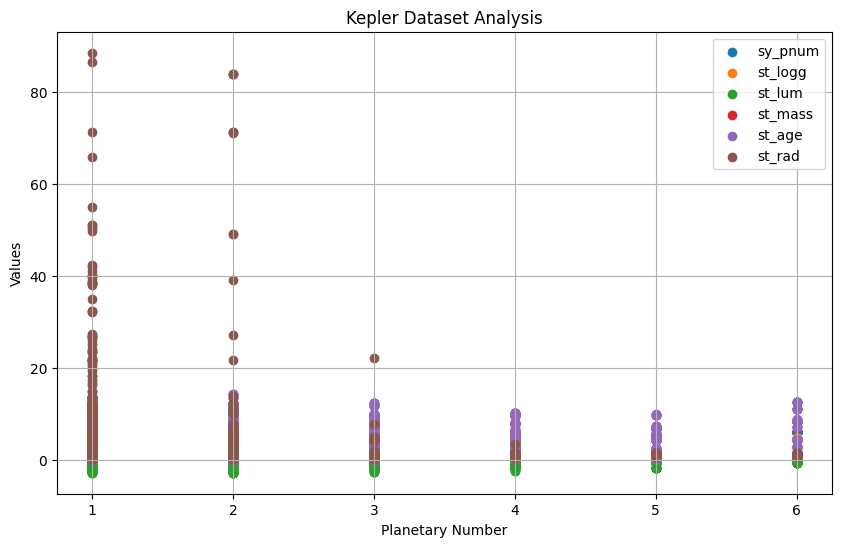

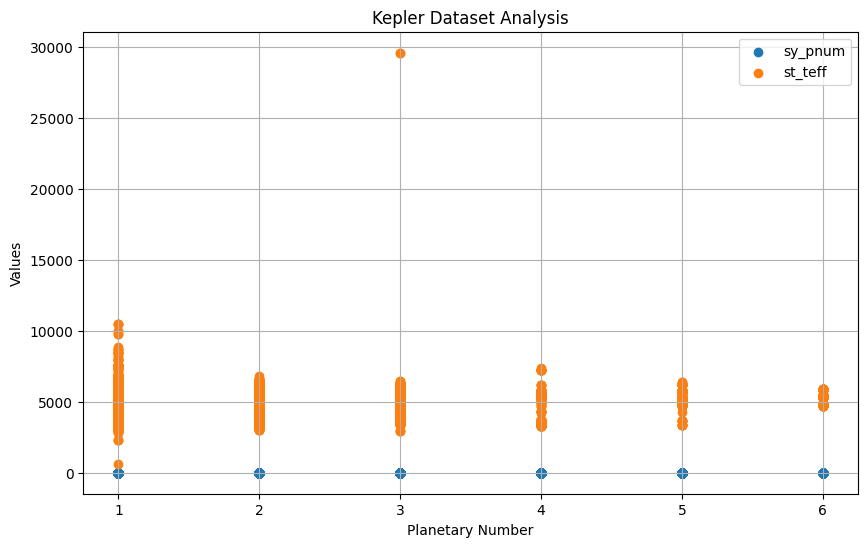

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#columns_of_interest = ['sy_pnum', 'st_logg', 'st_mass', 'st_rad'']
columns_of_interest = ['sy_pnum', 'st_logg', 'st_lum', 'st_mass', 'st_age', 'st_rad']
subset_data = exoplanet_data[columns_of_interest]

# Drop rows with missing values in any of the columns of interest
subset_data = subset_data.dropna()

# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 6))
for column in columns_of_interest:
    plt.scatter(subset_data['sy_pnum'], subset_data[column], label=column)

plt.xlabel('Planetary Number')
plt.ylabel('Values')
plt.title('Kepler Dataset Analysis')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

columns_of_interest = ['sy_pnum', 'st_teff']
subset_data = exoplanet_data[columns_of_interest]

# Drop rows with missing values in any of the columns of interest
subset_data = subset_data.dropna()

# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 6))
for column in columns_of_interest:
    plt.scatter(subset_data['sy_pnum'], subset_data[column], label=column)

plt.xlabel('Planetary Number')
plt.ylabel('Values')
plt.title('Kepler Dataset Analysis')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Because the the surface temperature (st_teff) has such an increased value compared to the other features, it is set here in its own graph. We see here already some evidence of outliers: some of the data points fall far above the others. We also notice some wider ranges of values for those stars hosting only a single exoplanet, particularly with regard to the stellar radius (st_rad).

Step 4: Machine Learning Model Development:

*   Compare exoplanet status with the above selected features.




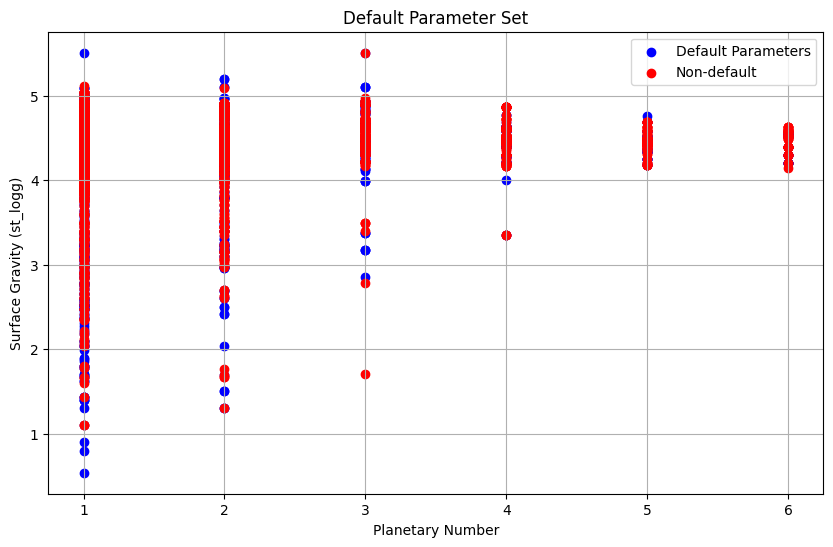

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

columns_of_interest = ['sy_pnum', 'st_logg', 'st_lum', 'st_mass', 'st_age', 'st_rad', 'st_teff', 'default_flag']
subset_data = exoplanet_data[columns_of_interest]

# Drop rows with missing values in any of the columns of interest
subset_data = subset_data.dropna()

# Separate defaults and non-defaults
exoplanets = subset_data[subset_data['default_flag'] == 1]
non_exoplanets = subset_data[subset_data['default_flag'] == 0]

# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 6))

# Plot default parameters in one color
plt.scatter(exoplanets['sy_pnum'], exoplanets['st_logg'], label='Default Parameters', color='blue')
# Plot non-default parameters in another color
plt.scatter(non_exoplanets['sy_pnum'], non_exoplanets['st_logg'], label='Non-default', color='red')

plt.xlabel('Planetary Number')
plt.ylabel('Surface Gravity (st_logg)')
plt.title('Default Parameter Set')
plt.legend()
plt.grid(True)
plt.show()


The default flag is set in the dataset if an exoplanet is assumed to reflect the default parameters of that stellar system. The number of default parameters that exist lie outside the total scope of this project's capabilities, but we measure it in comparison to the planet's surface gravity to find some amount of correlation.

Step 5: Attempt various learning models on the preprocessed data.

First attempts were linear models. By way of comparsion, random forests were used in later attempts.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer

# Define numerical and categorical features
numerical_features = ['st_logg', 'st_lum', 'st_mass', 'st_age', 'st_rad', 'st_teff']
categorical_features = ['st_spectype']

X_numerical = exoplanet_data[numerical_features]
X_categorical = exoplanet_data[categorical_features]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(X_numerical)

encoder = OneHotEncoder()
X_categorical_encoded = encoder.fit_transform(X_categorical)

X_combined = np.concatenate((X_numerical_imputed, X_categorical_encoded.toarray()), axis=1)

# Target variable: sy_pnum = number of planets in a system
y = exoplanet_data['sy_pnum']

# Perform feature selection using SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_combined, y)

# Data split and model
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Results.
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", lr_mse)
print("R-squared:", lr_r2)

Mean Squared Error: 1.1917290141788606
R-squared: 0.08008619655057281


In [ ]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR()

svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

# Results
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor Mean Squared Error:", svr_mse)
print("Support Vector Regressor R-squared:", svr_r2)

Support Vector Regressor Mean Squared Error: 1.523127792785708
Support Vector Regressor R-squared: -0.17572557547108691


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Results
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor MSE: ", rf_mse)
print("Random Forest Regressor R2: ", rf_r2)


Random Forest Regressor MSE:  0.293958949179512
Random Forest Regressor R2:  0.7730886033818287


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Results
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("Mean Squared Error: ", dt_mse)
print("R-squared: ", dt_r2)

Mean Squared Error:  0.37613989417989424
R-squared:  0.7096518784326923


In [ ]:
import xgboost as xgb

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred_xgb = xgb_model.predict(dtest)

# Results
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error:", xgb_mse)
print("XGBoost R-squared:", xgb_r2)

XGBoost Mean Squared Error: 0.805293933288583
XGBoost R-squared: 0.37838132977178096


***All results***

In [ ]:
from tabulate import tabulate

results = [
    ["Linear Regression", lr_mse, lr_r2],
    ["SVR", svr_mse, svr_r2],
    ["Decision Tree Regressor", dt_mse, dt_r2],
    ["Random Forest", rf_mse, rf_r2],
    ["XGBoosted Tree", xgb_mse, xgb_r2]
]

print(tabulate(results, headers=["Model", "Mean Squared Error (MSE)", "R-squared (R2)"]))

Model                      Mean Squared Error (MSE)    R-squared (R2)
-----------------------  --------------------------  ----------------
Linear Regression                          1.19173          0.0800862
SVR                                        1.52313         -0.175726
Decision Tree Regressor                    0.37614          0.709652
Random Forest                              0.293959         0.773089
XGBoosted Tree                             0.805294         0.378381


***Discussion***

**Selected Feature Definitions**
*   *st_logg*: Logarithmic acceleration of gravity at a star's surface.
*   *st_lum*: Luminosity of a star, which is the amount of energy emitted by a star per unit of time.
*   *st_mass*: Mass of a star, which is the amount of matter inside a star. Measured in Solar Masses.
*   *st_age*: Age of the star.
*   *st_rad*: Radius of a star, the distance from its center to its surface (note: this dataset did not specifically define "surface" as corona or chromosphere; either can be used in stellar astronomy)
*   *st_teff*: Stellar effective temperature (K) as modeled by a black body emitting the same total electromagnetic radiation.

*source: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS*

---
**Dataset**

The dataset itself comes from Nasa's Planetary Systems data, which offers a wide variety of measured exoplanets from a variety of missions performed over the last several decades.

It should be noted that evolving technology and the large variety of measurements, techniques, and overall methodology creates outliers, unconfirmed results, and many datapoints marked within the dataset as "controversial," meaning it is still under investigation.

This means that the models discussed below performed differently based on their sensitivities to these inconsistencies.

---

**Model Performance**

*Decision Tree Regressor*
Decision trees are prone to overfitting, which might have occurred due to the noise within the data. Like many of the models discussed here, it also might be unable to capture complex relationships between features and can be sensitive to the variations in the data.

*SVR*

Due to the complexity of the data, SVR might struggle to capture the relationships between the different features and the target variable (sy_pnum, which is the number of exoplanets detected in a stellar system). Some of these relationships may be non-linear or be too complex for SVR to perform well.

This model might also suffer from poor hyperparameter tuning or be confused by outliers. Also, because of the large variance of the data, it might require further scaling in order for this model to improve.

*Linear Regression*

Similarly to SVR, Linear Regression assumes a linear relationship, which might not exist in this dataset. It also might suffer from the complexities of higher dimensional data and be unable to capture the interaction between our chosen features. Due to this, Linear Regression may be prone to underfitting this particular dataset.

Linear Regression's other potential weakness in this variant dataset is its sensitivity to noise: stellar data can be hugely variable and prone to outliers and inaccuracies, which will have a greater impact on this particular model. Cleaning up some of this noise might produce a better model.

*XR Boosted Tree*

This model did not perform as well as some of the other trees. It was perhaps more sensitive to outliers, or else the preprocessed data did not sufficeintly compensate for imbalanced data. As discussed above, there is a wide amount of variety in the available data, which the model might have been particularly sensitive to.

*Decision Tree Regressor*

Overall, this model performed moderately well on the dataset, given its Mean Squared Error and R-squared results. It seems able to better handle the complex interactions between the features. In the future, some fine tuning of the hyperparameters and cleaning some of the dataset would probably benefit this model.

*Random Forest*

With a Mean Squared Error of only 0.293, this model performed better than all of the other models tested here. Similarly, its R-squared value was about 0.7, meaning it was able to capture a much larger amount of variance in our target variable, sy_pnum (number of planets in a system). The model was better able to ignore the outliers and other noise that "distracted" the other models.

---
**Conclusion**

Of the four models tested, the linear models performed the least poorly, which is surprising: it was hypothesized that there was a linear relationship between the features of a star and the number of exoplanets. However, if this relationship does exist, the models were not able to identify it.

In the process of writing the models, different features were tested, at one point only using three of the most prominent features (mass, size, and luminosity). The result was actually worse than the larger number of features used in the final models. This also suggests that the relationship between a star's features and the number of exoplanets is much more complicated than the linear models were able to train for.

There is some possiblity that the data is simply too variant. As mentioned, the dataset can be unpredictable, since it spans several decades of measurements, using various instruments, and measuring a variety of stars using different methodologies. It is possible that with better filtering of the data, some of these models would perform better.

With all of this in mind, the decision tree models outperformed the linear models, with Random Forest providing the most accurate results, based on MSE and R-squared values.